# Lab 4

Last time, we worked towards a fully functional k-means. Today, we are going to look at a few issues concerning k-means:   

0. Discuss what _Stopping Conditions_ are and how to use them
1. How to use the `sklearn` implementation for k-means
2. How do we decide if we have "good" clusters?

Today we will continue working with our Smith Students data. Please create a copy and place it in your Lab04 folder. Then create the `justtwo` dataframe with just _coffee_ and _sleep_ variables. 

In [15]:
# Package Import block
#    What packages do you need?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
from scipy.spatial import distance 

# New import
from sklearn.cluster import KMeans 

In [35]:
# Import your data 
students = pd.read_csv("students_info.csv", sep=',')
students.head()

# Create your subset
justtwo = students[["coffee", "sleep"]]
students.head()

,coffee,month,sleep,gym,color,gpa
0,0.7,apr,6.14,59.0,yellow,3.79
1,2.0,jun,6.98,111.0,green,2.34
2,1.5,sep,7.25,52.0,yellow,3.55
3,2.1,aug,5.02,102.0,purple,3.23
4,0.7,mar,4.93,50.0,purple,2.91


## Stopping Conditions

As a warm-up, let's start with a few questions about stopping conditions:
   1. What are stopping conditions? 
   2. Why do we care about them?
   3. Why are stopping conditions necessary for k-means?
   
* Write down at least 3 thoughts/ideas/questions about stopping conditions
* Pick at least 1 to share with the class

**Wait here for your fellow ML explorers**

(For HW2, you will be asked to share your full implementation of k-means, with an explanation of your stopping conditions.)

## `sklearn`

There are several important python packages for doing machine learning, but `sklearn` (or _scikit-learn_) is one of the most powerful. Unlike `numpy`, `pandas`, and `scipy` which serve to be used generally for numerical computations, data wrangling, and scientific computing, respectively, the `sklearn` package is specifically for applying machine learning algorithms to data. The implementations in `sklearn` seek to be optimized and this direct usage is considered to be "off the shelf". 

In this course, we will first program our own version of each algorithm and then switch to using the optimized versions. In a sense `sklearn` becomes our "check" after we have a deeper understanding of each method. 

_Note_ The phrase "off the shelf" refers to the analogy of going to a store and buying something that is designed to just work with little tinkering from the customer. When someone says they used "off the shelf" _method_ they mean that they did not modify the _method_ implementation. 

### k-means in `sklearn`

To use k-means in `sklearn`, there are two steps:
1. Setting up how the k-means will function, including:
   * How many clusters (i.e. the $k$).
   * How you would like the clusters to be selected
   * The starting random state
   * The maximum number of iterations through loop of assigning clusters and finding the centers
2. Applying the k-means you set up to your data

This might seem odd, and perhaps you are wondering why _scikit-learn_ can't do this in one step. I would argue that in fact, this two-step procedure mirrors how we as humans approach coding k-means cold. In fact, note that during the last class, 1) we developed our k-means algorithm and then 2) we applied that code to our dataset. 

In the below code block, we have one possible setting of `KMeans()` from `sklearn`. 
* What _type_ is the output and what information is contained within `km_alg`? 
* What are the various inputs (called _parameters_ in the helpfiles) doing? 

In [17]:
# Step one: Set up the k-means
km_alg = KMeans(n_clusters=2, init="random",random_state = 1, max_iter = 200)

In [18]:
# Code block for further discovery
type(km_alg)
print(km_alg)
print(np.shape(km_alg))


KMeans(init='random', max_iter=200, n_clusters=2, random_state=1)
()


Now that we have our k-means set up, we _fit_ it to our data. There are a few ways to [fit data using k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit). In this course, we will use `.fit()` and `.predict()` most often.

#### Using `.fit()`

This first fitting applies k-means to the data. What _type_ is the output and what information is contained within `fit1`?

In [19]:
# Step 2: Apply the set k-means to the data using .fit()
justtwo_np = justtwo.to_numpy()
fit1 = km_alg.fit(justtwo_np)

In [20]:
# Code block for further discovery
print(type(fit1))
print(fit1)
np.shape(fit1)

<class 'sklearn.cluster._kmeans.KMeans'>
KMeans(init='random', max_iter=200, n_clusters=2, random_state=1)


()

It's not immediately obvious how to access the 1) cluster assignments, nor 2) the centers for each cluster. The result of `.fit()` wraps this information inside a class style object. We can use `.labels_` and `.cluster_centers_` to access this information: 

In [21]:
print("Labels\n", fit1.labels_)

print("\n Cluster Centers \n",fit1.cluster_centers_)

Labels
 [0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0
 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0
 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0
 0 1 1 1]

 Cluster Centers 
 [[1.1208     5.164     ]
 [1.21657143 7.20417143]]


#### Using `.predict()`

If we discover more data that we want to compute the cluster label for **after** applying k-means, we can use `.predict()` on that point. For example, say your friend drinks an average of 1 cup of coffee and sleeps for 8 hours per night, which cluster do they belong to?

In [22]:
new_friend_label = km_alg.predict(np.array([[1,2]]))
print(new_friend_label)

[0]


### Plotting our results

Each time we apply a machine learning method, we should evaluate the results. One of the fastest and more visceral ways to do this is by plotting our results. Adapting the visualizations from [this example](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html), we proceed as follows:

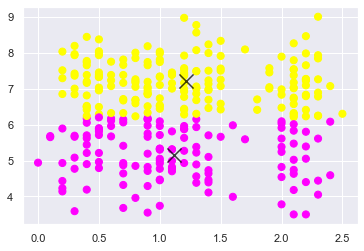

In [23]:
labels = fit1.labels_
centers = fit1.cluster_centers_

# Plot and color the points according to their label
plt.scatter(justtwo_np[:,0], justtwo_np[:,1], c=labels, s=50, cmap="spring")
# Add the cluster centers on top
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker="x", s=200, alpha=0.75)


**Is this what we expect? Check in with your local ML explorers after you make your next plots**


In class, we discussed how we expected to see different clusters. We are likely seeing this due to the scale of the data. So you may decide that you need to scale the different variables so that they are on the same size of axis. 

### Scaling variables

There are two big commonly used ways to scale variables: [normalizing and standardizing](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc). For this lab, we will _normalize_ all our variables which will place them within between 0 and 1. 

To _normalize_ variables, we need to find the minimum and maximum values for each one. Then we use them as follows:

$Var_{norm} = \dfrac{Var - Var_{min}}{Var_{max} - Var_{min}}$

Instead of looping over all the rows for each variable, we can do this computation without a `for` loop. 

In [24]:
# Normalizing Coffee variable

coffee = justtwo_np[:,0]
mx = np.max(coffee)
mn = np.min(coffee)

coffee_norm = (coffee - mn)/(mx - mn)
coffee_norm = np.around(coffee_norm, decimals = 2)

In [25]:
# Normalize the sleep variable 
sleep = justtwo_np[:,1]
mx = np.max(sleep)
mn = np.min(sleep)

sleep_norm = (sleep - mn)/(mx - mn)
sleep_norm = np.around(sleep_norm, decimals = 2)


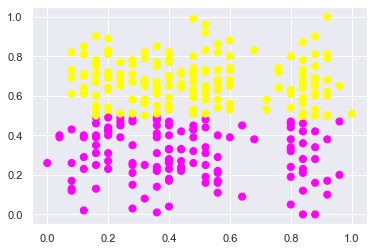

In [26]:
# Check your work with a scatter plot
labels = fit1.labels_
##centers = fit1.cluster_centers_

# Plot and color the points according to their label
plt.scatter(coffee_norm, sleep_norm, c=labels, s=50, cmap="spring")
# Add the cluster centers on top
##plt.scatter(centers[:, 0], centers[:, 1], c='black', marker="x", s=200, alpha=0.75)


In [27]:
# If you are happy with your plot, then create a new numpy array justtwo_norm using `np.stack()`

justtwo_norm = np.stack((coffee_norm, sleep_norm),axis=-1)


_Aside_ - Here we have to use `stack()` because our arrays are 1-D arrays and not 2-D arrays. (If you run `.shape()` on them, only one number comes out.) If we had 2-D arrays, we would use `concatenate` with syntax like:

`out_np = np.concatenate((twoD_array1, twoD_array2),axis=1)`

### k-means + scaled variables

The next "check" is whether our scaling did what we expect. Using `sklearn`, deploy kmeans on the normalized data and plot your results. Did you get what you expected?

**Check in with your local ML explorers after you make your next plots**


In [28]:
# Run kmeans on your normalized data
km_alg_norm = KMeans(n_clusters=3, init="random",random_state = 1, max_iter = 200)
#justtwo_norm_np = justtwo_norm.to_numpy()
fit2 = km_alg_norm.fit(justtwo_norm)

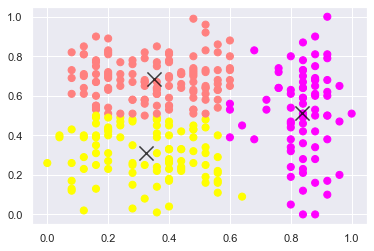

In [29]:
# Plot the results
labels = fit2.labels_ 
centers = fit2.cluster_centers_

# Plot and color the points according to their label
plt.scatter(justtwo_norm[:,0], justtwo_norm[:,1], c=labels, s=50, cmap="spring")
# Add the cluster centers on top
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker="x", s=200, alpha=0.75)



## "Good" Clusters

When we have grouped our data into clusters, we would like to know if these are "good" clusters. We might want to look at the:
* The spread of the cluster 
* How separated the clusters are from each other 

### Within Cluster Sum of Squares

A common measure for clusters is the _within cluster sum of squares_ which is the total distance between each data point and the cluster center. Using `cdist` and `np.sum` within a `for` loop, we can compute this total. Below is just a bit of code to get you started:

In [1]:
# Within cluster sum of squares
print(np.shape(justtwo_norm))
total = 0
k = 2
km_alg_norm = KMeans(n_clusters=k, init="random",random_state = 1, max_iter = 200)
fit2 = km_alg_norm.fit(justtwo_norm) 

for i in range (0, k): 
# Compute the following for each cluster: 
    # double bracket
    cluster_center = [fit2.cluster_centers_[i]]
    inds = (fit2.labels_ == i)
    cluster_points = justtwo_norm[inds,:]
    
    # Given
    cluster_spread = distance.cdist(cluster_points, cluster_center, 'euclidean')
    cluster_total = np.sum(cluster_spread)
    print(cluster_total)
    
    
# Add all the cluster_totals together
    total += cluster_total
print(total)

NameError: name 'np' is not defined

**Question** - As $k$ increases, what happens to the _within cluster sum of squares?_

decreases


### Cluster separation 

In cluster separation, we seek to understand the average distance of points from one cluster to the nearest cluster. Again, we use `cdist` but this time we are comparing the points within one cluster to another cluster. We have to compute an average and repeat this process for each cluster. This computation may involve a nested `for` loop. Again, the below code block has a bit of code to get you started:

In [116]:
# Cluster separation
total = 0
num_clusts = 4

km_alg_norm = KMeans(n_clusters=num_clusts, init="random",random_state = 1, max_iter = 200)
fit2 = km_alg_norm.fit(justtwo_norm)

# Compute the following for each cluster:
cluster_sep_mat = np.zeros((num_clusts, num_clusts))
for i in range(0, num_clusts):
    inds = (fit2.labels_ == i)
    cluster_points = justtwo_norm[inds,:]
    for j in range(0, num_clusts):
        if (i != j):
            inds = (fit2.labels_ == j)
            cluster_points2 = justtwo_norm[inds,:]
            
            cluster_ij = distance.cdist(cluster_points, cluster_points2, 'euclidean')
            cluster_sep_mat[i,j] = np.sum(cluster_ij)/len(cluster_ij)  
    
    # For each cluster determine which is the closest average 
    mn = np.min(cluster_sep_mat[i,][np.nonzero(cluster_sep_mat[i,])]) 
    total += mn

# Determine either the average or total of the closest averages
print(total)


82.28375335286688


**Question** - As $k$ increases, what happens to _cluster separation?_

### Which way is "right"?

In machine learning in general, but in unsupervised in particular, there is often not one right, perfect, or even universally accepted way to evaluate an algorithm. Here a careful eye on 1) your data, 2) your goals, and 3) the overall context of your data and goals is collectively important. 

### Final Thoughts

To finish up this lab, play with different values for $k$ and decide what the correct value is for this dataset is. Create a post to **#lab-04-submission** channel on slack stating what you think the correct value for $k$ is with 1) your thinking and 2) a plot of the resulting clustering. 

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab4**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### Resources Consulted

0. _Python Machine Learning_
1. [k-means helpfile in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
2. [In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
3. [Colormaps in matplotlib (ie. `cmap`)](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
4. [Scatter Helpfile](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)
5. [Standardize or Normalize? — Examples in Python](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc)
6. [Concatenation of 2 1D `numpy` Arrays Along 2nd Axis](https://stackoverflow.com/questions/35401041/concatenation-of-2-1d-numpy-arrays-along-2nd-axis)
7. [`stack()` helpfile](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.stack.html)
8. [`concate()` helpfile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html#numpy.concatenate)
9. [Interpret all statistics and graphs for Cluster K-Means](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-k-means/interpret-the-results/all-statistics-and-graphs/#average-distance-from-centroid)